## Esse aluguel está caro? 
### Um projeto de webscraping e Machine Learning (versão 1)

Quem tem apartamento alugado ja sabe: deu um ano? o preço aumenta. A grande maioria dos contratos de alguel tem como claussula de reajuste para 1 ano depois de morar no imovel, ajustado de acordo com o IGP-M acumulado de um ano. Só que, diferente dos ultimos 20 anos, o IGP-M está muito alto hoje em dia (2021), o que esta causando um aumento absurdo nos valores de aluguel dos Millenials por aí.


GRAFICO DO IGPM

O mesmo aconteceu aqui em casa. Fez um ano agora em Julho que eu me mudei para morar com meu namorado, e o nosso aluguel (que era 800 reais) subiria bastante para os padrões desse apartamento (1040 reais num apartamento 2 quartos que nem interfone tem não dá ne). Felizmente a gente conseguiu conversar com o proprietario e estabelecemos um aumento justo (para 880 reais). Mas ainda assim eu fiquei com aquela duvida: Será que esse aumento é justo para os apartamentos da vizinhança.

E foi assim que surgiu esse projeto: para responder a pergunta "O meu aluguel está caro?" vamos usarr algumas bibliotecas de python, os meus conhecimentos quase nulos em HTML (o deficit do jovem que nunca teve um tumblr) e os anuncios do ZAP Imoveis, OLX e VivaReal num modelo de aprendizado de maquina.


Quem tem experiencia na cozinha, quando vai fazer alguma receita, sempre começa reunindo os ingredientes. O mesmo vale por aqui, vamos começar importanto os bibliotecas e estabelecendo algumas propriedades do servidor para o nosso webscrapping.

In [2]:
from bs4 import BeautifulSoup
from requests import get
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
sns.set()

In [3]:
headers = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})

### Testes


Vamos agora explorar a estrutura das plataformas que vamos usar para depois automatizar a raspagem dos dados. Precisamso saber onde cada dado dos anuncios está no código fonte do site e como essas 'localizações' podem variar no texto. O primeiro  a ser testado é o do ZAP imoveis




#### ZAP imoveis


O que eu fiz aqui foi extrair o codigo fonte de uma pagina do ZAP imoveis. Mais especificamente dessa pagina [aqui][zap]. Nessa pagina tem imoveis do meu bairro e bairros vizinhos, que é exatamente o conjunto de dados que eu quero para esse projeto.



[zap]: https://www.zapimoveis.com.br/aluguel/apartamentos/mg+belo-horizonte++liberdade/?pagina=2&onde=,Minas%20Gerais,Belo%20Horizonte,,Liberdade,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ELiberdade,-19.865305,-43.952023%3B,Minas%20Gerais,Belo%20Horizonte,,Ouro%20Preto,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EOuro%20Preto,-19.874898,-43.992275%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Francisco,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Francisco,-19.877506,-43.956058%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Lu%C3%ADz,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Luiz,-19.857363,-43.967109%3B,Minas%20Gerais,Belo%20Horizonte,,Jaragu%C3%A1,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EJaragua,-19.858255,-43.952023&transacao=Aluguel&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento


In [4]:
zap="https://www.zapimoveis.com.br/aluguel/apartamentos/mg+belo-horizonte++liberdade/?pagina=2&onde=,Minas%20Gerais,Belo%20Horizonte,,Liberdade,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ELiberdade,-19.865305,-43.952023%3B,Minas%20Gerais,Belo%20Horizonte,,Ouro%20Preto,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EOuro%20Preto,-19.874898,-43.992275%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Francisco,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Francisco,-19.877506,-43.956058%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Lu%C3%ADz,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Luiz,-19.857363,-43.967109%3B,Minas%20Gerais,Belo%20Horizonte,,Jaragu%C3%A1,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EJaragua,-19.858255,-43.952023&transacao=Aluguel&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento"
response = get(zap, headers=headers)

In [5]:
print(response) #dizem que response [200] é o sinal de que está funcionando.

<Response [200]>


In [6]:
html_soup = BeautifulSoup(response.text, 'html.parser')

Aqui fizemos alguns protocolos para raspagem de dados em HTML, eu não entendo muito dessas coisas então nõ voi me aprofundar aqui, o importante é que funciona. Você pode encontrar mais informações para esse texto [aqui][webscraping].


[webscraping]:https://medium.com/@fneves/looking-for-a-house-build-a-web-scraper-to-help-you-5ab25badc83e

In [7]:
zap = "https://www.zapimoveis.com.br/aluguel/apartamentos/mg+belo-horizonte++liberdade/?onde=,Minas%20Gerais,Belo%20Horizonte,,Liberdade,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ELiberdade,-19.865305,-43.952023%3B,Minas%20Gerais,Belo%20Horizonte,,Ouro%20Preto,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EOuro%20Preto,-19.874898,-43.992275%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Francisco,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Francisco,-19.877506,-43.956058%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Lu%C3%ADz,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Luiz,-19.857363,-43.967109%3B,Minas%20Gerais,Belo%20Horizonte,,Jaragu%C3%A1,,,neighborhood,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EJaragua,-19.858255,-43.952023&transacao=Aluguel&tipoUnidade=Residencial,Apartamento&tipo=Im%C3%B3vel%20usado&pagina=1"
response = get(zap, headers=headers)
html_soup = BeautifulSoup(response.text, 'html.parser')

house_containers_zap = html_soup.find_all('div', class_="simple-card__box")
first_zap = house_containers_zap[0]
test_zap = first_zap.find_all(['span', 'p'])[15].text
test_zap = re.sub("[^0-9]", "", test_zap)
print('quartos: ', test_zap)

quartos:  3


A primeira tentativa de extração dos dados da ZAP moveis eu estava fazendo com base na posiçao de cada elemento no texto, sendo que esse método, embora mais facil para os inciantes, é mais complexo e menos eficiente dado que as coisas podem mudar de posição a depender do conteúdo do anuncio.  Por isso, mais tarde ao analisar os conteudos do viva real eu refiz a função de extração de dados do Zap imoveis e ficou bem mais eficiente. De toda forma, a ideia aqui  era extrair os dados de cada anuncio com base na classe de cada cartão. Para descobrir a classe de cada anuncio eu apertei F12 na pagina do Zap e fui inspecionando cada elemento usando o botão direito do mouse e indo em "inspecionar". Falando assim parece ate bem complexo, mas na pratica é muito simples ;)

#### Testando na olx

A proxima plataforma a ser explorada foi a OLX. Ela é mais simples de interagir com o site porque as informações ficam todas num bloco de texto só. Mas exigiu de mim extrair os dados com base no conteudo em texto, que é ate ok de se fazer. Os protocolos são os mesmos da parte anterior.

In [8]:
olx = "https://mg.olx.com.br/belo-horizonte-e-regiao/pampulha/imoveis/aluguel/apartamentos?pe=1300&ps=600&roe=2&ros=1"
response = get(olx, headers=headers)
html_soup = BeautifulSoup(response.text, 'html.parser')

house_containers_olx = html_soup.find_all('a', class_="fnmrjs-0 fyjObc")

test_olx = house_containers_olx[10].find_all(['span', 'p'])
#first_quinto = house_containers_quinto[0]

In [9]:
print("especificacoes=",test_olx[1].text)
print("aluguel=",test_olx[2].text)
print("localizaçao=",test_olx[5].text)

especificacoes= 2 quartos | 72m² | Condomínio: R$ 311 | 1 vaga
aluguel= R$ 1.250
localizaçao= Belo Horizonte, São Luiz


Aqui vemos que as especificações do apartamento são um pedaço de texto só, enquanto o aluguel e a localização tem um cartão separado. Para quem nunca interagiu com sites dessa forma antes e está afim de explorar dados de venda ou aluguel de coisas e imoveis eu recomendo bastante começar pela OLX por causa disso. Pela OLX também tem uma vantagem de que no anuncio o aluguel, a descriçao e a localização tem posições muito bem estabelecidas, o que é outra facilidade de interagir com a plataforma.

#### Viva Real

A ultima plataforma na qual eu testei a extração de dados foi na viva real, que funciona mais ou menos como a do Zap imoveis. A diferença principal entre as duas é que a do Zap tem uma variação estavel da posição dos objetos no bloco do anúncio, enquanto no viva real  um mesmo objeto (como por exemplo o condominio) pode estar desde a posição 29 no texto ate a posição 39, o que é bastante coisa e exigiu de mim desenvolver umafunção so para procurar cada objeto no bloco de texto do anúncio. Os procedimentos são os mesmos anteriores.

In [10]:
vivareal = "https://www.vivareal.com.br/aluguel/minas-gerais/belo-horizonte/bairros/liberdade/apartamento_residencial/#onde=BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Liberdade,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Ouro_Preto,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Sao_Luiz,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Sao_Jose,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Sao_Francisco,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Jaragua,BR-Minas_Gerais-NULL-Belo_Horizonte-Barrios-Bandeirantes"
response = get(vivareal, headers=headers)
html_soup = BeautifulSoup(response.text, 'html.parser')

house_containers_vivareal = html_soup.find_all('div',
                                               class_="js-card-selector")

test_vivareal = house_containers_vivareal[10].find_all(['span', 'p'])
#first_quinto = house_containers_quinto[0]

In [11]:
print("quartos=", test_vivareal[7].text)
print("area=", test_vivareal[5].text)
print("banheiros=", test_vivareal[9].text)
print("garagens=", test_vivareal[11].text)
print("aluguel=", test_vivareal[13].text)
print("localizaçao=", test_vivareal[3].text)

quartos=  3 
area=  85 
banheiros=  2 
garagens=  1 
aluguel=   R$ 1.500 /Mês 
localizaçao= Liberdade, Belo Horizonte - MG


Aqui temos a extração dos dados naquele mesmo primeiro modelo de se basear nas posições. Mas vamos automatizar isso melhor mais pra frente.

 ### Extração dos dados
 
 Aqui eu vou criar uma serie de funções pra automatiza a extração dos meus dados das 3 plataformas. As duas primeiras qe eu criei não tem a ver com alguma plataforma em especifico. A primeira é: 

In [12]:
def return_patterned_housings(aluguel, localizacao, quartos, condominio, iptu,
                              area, banheiros, garagens, host):
    return [
        aluguel, localizacao, quartos, condominio, iptu, area, banheiros,
        garagens, host
    ]

Essa função serve apenas para organizar os dados de cada uma das plataformas de forma padronizada. Assim não teremos problema com dados fora de ordem e tudo mais.

A segunda função:

In [13]:
def get_card_values(text, attr, attr_name, regex="[^0-9]", regex_div=''):
    for line in text:
        if line.has_attr(attr):
            if any(word in [attr_name] for word in line[attr]):
                ret = re.sub(regex, regex_div, line.text)
                if ret == '':
                    return 0
                else:
                    return ret
    return 0

 Serve para achar no texto uma determinada classe ou propriedade e retornar ela formatada de acordo com o que a gente quer (se for por exemplo numero de quartos retornará apaenas os numeros e etc). Ela tem varios 'if' no meio dela por causa do debugging, e ela foi escrita depois de eu ter teimado bastante em tentar extrair os dados com base na posição.
 
 
 #### Zap imoveis
 
 
 O primeiro site a ser explorado é o Zap imoveis. A função que extrai os dados de u anuncio usa a função anterior para pegar cada dado com base na classe do objeto HTML. pra achar as classes de cada item foi o mesmo esquema de  achar a classe dos anuncios, indo no F12 e inspecionar.

In [14]:
def get_zap(anuncio):
    anuncio_data = anuncio.find_all(['p', 'span', 'li'])
    anuncio_data_aluguel = get_card_values(anuncio_data, 'class', "js-price")
    anuncio_data_localizacao = get_card_values(anuncio_data,
                                               'class',
                                               "simple-card__address",
                                               regex=r'[^\w]',
                                               regex_div=' ')
    anuncio_data_quartos = get_card_values(anuncio_data, 'class',
                                           "js-bedrooms")
    anuncio_data_area = get_card_values(anuncio_data, 'class', "js-areas")
    anuncio_data_banheiros = get_card_values(anuncio_data, 'class',
                                             "js-bathrooms")
    anuncio_data_garagem = get_card_values(anuncio_data, 'class',
                                           "js-parking-spaces")
    anuncio_data_condominio = get_card_values(anuncio_data, 'class',
                                              "condominium")

    anuncio_data_iptu = get_card_values(anuncio_data, 'class', 'iptu')

    return return_patterned_housings(aluguel=float(anuncio_data_aluguel),
                                     localizacao=anuncio_data_localizacao,
                                     quartos=int(anuncio_data_quartos),
                                     condominio=float(anuncio_data_condominio),
                                     iptu=float(50),
                                     area=float(anuncio_data_area),
                                     banheiros=int(anuncio_data_banheiros),
                                     garagens=int(anuncio_data_garagem),
                                     host='zap')

Fazendo um teste rodando em todos os anuncios de uma pagina o zap:

In [15]:
for anuncio in house_containers_zap[0:5]:
    print(get_zap(anuncio))

[1550.0, '           Rua dos Aeronautas  Liberdade         ', 3, 250.0, 50.0, 79.0, 3, 1, 'zap']
[1100.0, '           Liberdade  Belo Horizonte         ', 2, 321.0, 50.0, 57.0, 1, 1, 'zap']
[1684.0, '           Rua Professor Almeida Cunha  São Luíz         ', 3, 320.0, 50.0, 75.0, 2, 0, 'zap']
[1350.0, '           Rua Expedicionário Mário Alves de Oliveira  São Luíz         ', 1, 0.0, 50.0, 50.0, 1, 1, 'zap']
[1500.0, '           Rua Sena Madureira  Ouro Preto         ', 3, 657.0, 50.0, 100.0, 3, 2, 'zap']


Depois de muito debugging e testes, a função roda lisa :D.

#### Olx
A proxima função é a de extrair dados de um anuncio da Olx. essa função primeiro separa o aluguele  a localização que têm classe separada, e em seguida analisa o texto da descrição procurando as palavras 'quarto',  'Condomínio', 'm²' e 'vaga' e extraindo os numeros que vem logo antes desssas palavras para extrair esses dados. Os anuncios da Olx tiveram um bug peculiar de que alguns anuncior eram desativados mas continuavam no texto do site, e a função tava detectando esses apartamentos. Para contornar isso o que eu fiz foi olhar para a localização, os anuncios desativados não tinham localização, entao bastou eu colocar o programa para ignorar os anuncios que não tem "Belo" (de Belo Horizonte) escrito na localização. Os anuncios da olx não tinham o IPTu registrado, então eu estimei um valor de mais ou menos 7% do aluguel, que é o que eu pagava no apartamento anterior).

Essa função está cheia de ifs porque os anuncios da Olx tem uma boa parte dos dados faltando. Para contornar isso o que eu asssumi foi que:
* Se não tem vagas de garagem na descrição é porque simplesmente não tem
* Se não tem quartos na descrição é porque tem 1 quarto
* Se não tem banheiros na descrição é porque tem 1 banheiro (se tiver so 1 quarto) ou numero_de_banheiros-1 (se tiver mais de 1 quarto)

In [16]:
def get_olx(anuncio):
    anuncio_data = anuncio.find_all(['span', 'p'])
    anuncio_data_aluguel = re.sub("[^0-9]", "", anuncio_data[2].text)
    anuncio_data_localizacao = re.sub(r'[^\w]', " ", anuncio_data[5].text)

    if anuncio_data_localizacao.find('Belo') == -1:
        return

    if anuncio_data[1].text.find('quarto') > -1:
        if re.sub(
                "[^0-9]", "",
                anuncio_data[1].text[anuncio_data[1].text.find('quarto') -
                                     2]) == '':
            anuncio_data_quartos = 1
        else:
            anuncio_data_quartos = int(
                re.sub(
                    "[^0-9]", "",
                    anuncio_data[1].text[anuncio_data[1].text.find('quarto') -
                                         2]))
            
    else:
        anuncio_data_quartos = 1

    if anuncio_data[1].text.find('Condomínio') > -1:
        anuncio_data_condominio = re.sub(
            "[^0-9]", "",
            anuncio_data[1].text[anuncio_data[1].text.find('Condomínio') +
                                 12:anuncio_data[1].text.find('Condomínio') +
                                 18])
    else:
        anuncio_data_condominio = 0

    if anuncio_data[1].text.find('vaga') > -1:
        anuncio_data_garagem = re.sub(
            "[^0-9]", "",
            anuncio_data[1].text[anuncio_data[1].text.find('vaga') - 2])
        if anuncio_data_garagem == '':
            anuncio_data_garagem = 0
    else:
        anuncio_data_garagem = 1

    if anuncio_data[1].text.find('m²') > -1:
        anuncio_data_area = re.sub(
            "[^0-9]", "",
            anuncio_data[1].text[anuncio_data[1].text.find('m²') -
                                 3:anuncio_data[1].text.find('m²')])
        if anuncio_data_area == '':
            anuncio_data_area = 10
    else:
        anuncio_data_area = 30

    if anuncio_data_quartos == 1:
        anuncio_data_banheiros = 1
    else:
        anuncio_data_banheiros = anuncio_data_quartos - 1

    return return_patterned_housings(aluguel=float(anuncio_data_aluguel),
                                     localizacao=anuncio_data_localizacao,
                                     quartos=int(anuncio_data_quartos),
                                     condominio=float(anuncio_data_condominio),
                                     iptu=float(anuncio_data_aluguel)*0.07,
                                     area=float(anuncio_data_area),
                                     banheiros=int(anuncio_data_banheiros),
                                     garagens=int(anuncio_data_garagem),
                                     host='olx')

 Mais um teste, que também exigiu muito debugging e paciencia.

In [17]:
for anuncio in house_containers_olx[0:5]:
    print(get_olx(anuncio))

[700.0, 'Belo Horizonte  Santa Amélia', 1, 0.0, 49.00000000000001, 30.0, 1, 1, 'olx']
[750.0, 'Belo Horizonte  Santa Amélia', 1, 0.0, 52.50000000000001, 30.0, 1, 1, 'olx']
[870.0, 'Belo Horizonte  Liberdade', 1, 195.0, 60.900000000000006, 43.0, 1, 1, 'olx']
[800.0, 'Belo Horizonte  Santa Amélia', 1, 0.0, 56.00000000000001, 35.0, 1, 1, 'olx']
[700.0, 'Belo Horizonte  Santa Amélia', 1, 0.0, 49.00000000000001, 30.0, 1, 1, 'olx']


#### Viva Real

O Viva Real é a mesma coisa do Olx mas com classes diferentes. A diferença é so que aqui não tem o IPTU, então eu assumi a mesma coisa  que na olx, 7% do aluguel.

In [18]:
def get_vivareal(anuncio):
    anuncio_data= anuncio.find_all(['div', 'p', 'span', 'li'])
    anuncio_data_aluguel = get_card_values(anuncio_data, 'class',
                                        "property-card__price")
    anuncio_data_localizacao = get_card_values(anuncio_data,
                    'class',
                    "property-card__address",
                    regex=r'[^\w]',
                    regex_div=' ')  
    anuncio_data_quartos = get_card_values(anuncio_data, 'class',
                                           "js-property-detail-rooms")
    anuncio_data_area = get_card_values(anuncio_data, 'class',
                                        "js-property-card-detail-area")
    anuncio_data_banheiros = get_card_values(anuncio_data, 'class',
                                             "js-property-detail-bathroom")
    anuncio_data_garagem = get_card_values(anuncio_data, 'class',
                                           "js-property-detail-garages")
    anuncio_data_condominio = get_card_values(anuncio_data, 'class',
                                        "property-card__price-details--condo")
    
    
    
    return return_patterned_housings(aluguel=float(anuncio_data_aluguel),
                                     localizacao=anuncio_data_localizacao,
                                     quartos=int(anuncio_data_quartos),
                                     condominio=float(anuncio_data_condominio),
                                     iptu=float(anuncio_data_aluguel)*0.07,
                                     area=float(anuncio_data_area),
                                     banheiros=int(anuncio_data_banheiros),
                                     garagens=int(anuncio_data_garagem),
                                    host='vivareal')

Testes Testes Testes

In [19]:
for anuncio in house_containers_vivareal[0:5]:
    print(get_vivareal(anuncio))

[1550.0, 'Rua dos Aeronautas  400   Liberdade  Belo Horizonte   MG', 3, 250.0, 108.50000000000001, 79.0, 3, 1, 'vivareal']
[1200.0, 'Liberdade  Belo Horizonte   MG', 3, 360.0, 84.00000000000001, 75.0, 1, 1, 'vivareal']
[1200.0, 'Rua Boaventura  771   Liberdade  Belo Horizonte   MG', 2, 400.0, 84.00000000000001, 76.0, 2, 1, 'vivareal']
[1100.0, 'Liberdade  Belo Horizonte   MG', 2, 321.0, 77.00000000000001, 57.0, 1, 1, 'vivareal']
[1500.0, 'Rua Flor de fogo  65   Liberdade  Belo Horizonte   MG', 3, 453.0, 105.00000000000001, 70.0, 2, 1, 'vivareal']


#### Automatização das paginas

Feitas as funções que conseguem extrair os dados de um unico anuncio, agora basta fazer as funções que extraem os dados de uma pagina inteira de anuncios. O processo é mais ou menos a mesma coisa que esse for que eu usei para testar se as funções estavam funcionando (inclusive provavelmente eu poderia fazer uma função só ao invés de uma pra cada pagina, mas deixemos isso pras próximas versões desse projeto).

In [20]:
def get_page_zap(page_url):
    response = get(page_url, headers=headers)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    house_containers = html_soup.find_all('div', class_="simple-card__box")
    ret = []
    for anuncio in house_containers:
        ret.append(get_zap(anuncio))
    return ret


def get_page_olx(page_url):
    response = get(page_url, headers=headers)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    house_containers =  html_soup.find_all('a', class_="fnmrjs-0 fyjObc")
    ret = []
    for anuncio in house_containers:
        ret.append(get_olx(anuncio))
    return ret


def get_page_vivareal(page_url):
    response = get(page_url, headers=headers)
    html_soup = BeautifulSoup(response.text, 'html.parser')

    house_containers = html_soup.find_all('div', class_="js-card-selector")
    ret = []
    for anuncio in house_containers:
        ret.append(get_vivareal(anuncio))
    return ret


Agora é so botar esse for pra rodar em cada página do site. pra isso a gente precisa descobrir onde entra o numero da pagina na url do site, o que é bem simples de fazer, basta ir mudando manualmente a pagina e observando onde que está mudando na url. Feito isso teremos os nossos dados de forma bruta, organizados em listas.

In [21]:
url_zap_1="https://www.zapimoveis.com.br/aluguel/apartamentos/mg+belo-horizonte++liberdade/?onde=,Minas%20Gerais,Belo%20Horizonte,,Liberdade,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ELiberdade,-19.865305,-43.952023%3B,Minas%20Gerais,Belo%20Horizonte,,Ouro%20Preto,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EOuro%20Preto,-19.874898,-43.992275%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Francisco,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Francisco,-19.877506,-43.956058%3B,Minas%20Gerais,Belo%20Horizonte,,S%C3%A3o%20Lu%C3%ADz,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3ESao%20Luiz,-19.857363,-43.967109%3B,Minas%20Gerais,Belo%20Horizonte,,Jaragu%C3%A1,,,,BR%3EMinas%20Gerais%3ENULL%3EBelo%20Horizonte%3EBarrios%3EJaragua,-19.858255,-43.952023&pagina="
url_zap_2="&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento&transacao=Aluguel"


url_zap_pages= [url_zap_1 + str(x) + url_zap_2 for x in list(range(1,11))]
url_zap_pages

zap_data=[]

for url in url_zap_pages:
    zap_data+=get_page_zap(url)

In [22]:
url_olx_1="https://mg.olx.com.br/belo-horizonte-e-regiao/pampulha/imoveis/aluguel/apartamentos?o="
url_olx_2="&pe=8000&ps=100&roe=5&ros=0"

url_olx_pages= [url_olx_1 + str(x) + url_olx_2 for x in list(range(1,11))]
url_olx_pages

olx_data=[]

for url in url_olx_pages:
    olx_data+=get_page_olx(url)

In [23]:
url_vivareal_1 = "https://www.vivareal.com.br/aluguel/minas-gerais/belo-horizonte/bairros/" 
url_vivareal_2 = "/apartamento_residencial/"


bairros=["liberdade", "ouro-preto", "sao-francisco", "sao-luiz", "jaragua", "bandeirantes"]
url_vivareal_pages = [url_vivareal_1 + str(x) + url_vivareal_2 for x in bairros]
url_vivareal_pages

vivareal_data = []

for url in url_vivareal_pages:
    vivareal_data += get_page_vivareal(url)

### Explorando e tratando os dados


Agora vem para mim o que é a aprte mais legal: a exploração dos dados!! Vamos começar juntando o dados em uma grande lista só. Para isso basta fazer uma lista com os dados desempacotados (o * é para isso :)). Também colocamos um filtro nos dados da Olx, para tirar os dados nulos.

In [24]:
total_data= [*zap_data , *vivareal_data , *list(filter(None, olx_data))]

Hora de explorar os dados. Vou começar tirando alguns conjuntos de dados como listas, para facilitar 

In [34]:
alugueis=[a[0] for a in total_data]
condominio=[a[3] for a in total_data]
area=[a[5] for a in total_data]

Text(0, 0.5, 'aluguel')

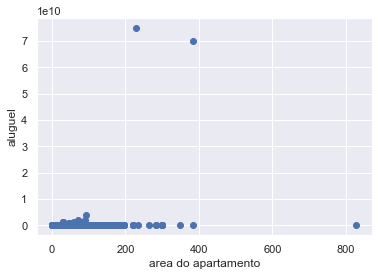

In [35]:
plt.plot(area, alugueis, 'o') #pequeno exemplo de como se graficar os dados
plt.xlabel('area do apartamento')
plt.ylabel('aluguel')

Aqui vemos que existem alguns valores de aluguel que estão bem maiores que o normal. Esse valores provavelmente são de apartamentos a venda, e por isso vamos remove-los do algoritmo. Mas antes, vamos transforar os dados em um unico dataframe e criar uma coluna pro valor total do apartamento, e em seguida explorar um pouco os dados do dataset.

<AxesSubplot:xlabel='quartos', ylabel='total'>

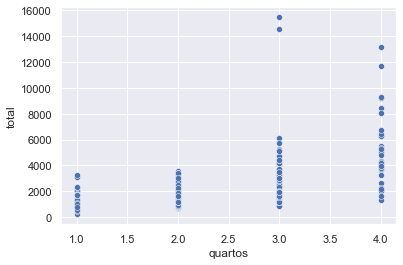

In [36]:
df=pd.DataFrame(total_data, columns= [
                      "aluguel", "localizacao", "quartos", "condominio", "iptu", "area",
                      "banheiros", "garagens", 'host'
                  ])

df['total']= df.aluguel+df.condominio+df.iptu

sns.scatterplot(data=df[df.aluguel<100000],x='quartos', y='total' )

Nesse gráfico aqui vemos que o numero de quartos influencia no valor do aluguel, dado que o valor total de gastos aumenta com o numero de quartos. Plotanto agora com o numero de banheiros:

<AxesSubplot:xlabel='banheiros', ylabel='total'>

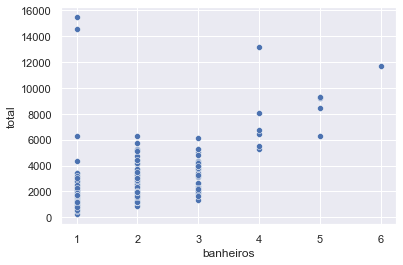

In [30]:
sns.scatterplot(data=df[df.aluguel<100000],x='banheiros', y='total' )

O mesmo vale pro numero de banheiros. Quanto mais, mais caro.

<AxesSubplot:xlabel='garagens', ylabel='total'>

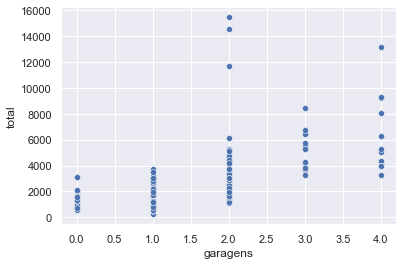

In [31]:
sns.scatterplot(data=df[df.aluguel<100000],x='garagens', y='total' )

O mesmo vale pro número de garagens.

<AxesSubplot:xlabel='area', ylabel='total'>

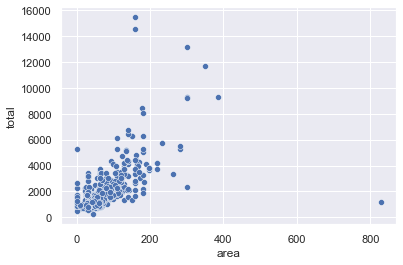

In [32]:
sns.scatterplot(data=df[df.aluguel<100000],x='area', y='total' )

A area também tem essa propriede, tendo um formato até meio linear. Vamos observar agora como os anuncios estão distribuidos nas plataformas, sem remover os anuncios duplicados:

<AxesSubplot:xlabel='total', ylabel='Count'>

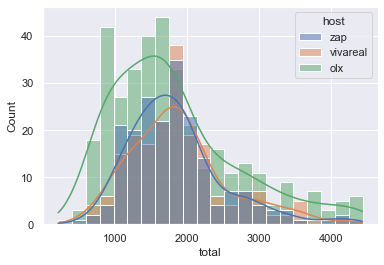

In [37]:
sns.color_palette("crest", as_cmap=True)
sns.histplot(data=df[df.aluguel<4000],x='total', kde=True, hue='host')

Aqui vemos que os sites tem uma quantidade parecida de anuncios e uma distribuição também correlacionada. Vemos também que o que mais tem anuncios é o olx, sendo destaue principalmente em apartamentos mais baratos. Isso provavelmente acontece porque enquanto o Viva Real e o Zap imoveis são mais focados e imobiliarias o Olx ja tem uma cultura de lidar com direto com o proprietário. O olx também tem outros usos relacionados a compra e venda de objetos.   

Feita toda essa exploração dos dados vamos agora limpar os dados que estão dublicados e de venda de imoveis. Para considerar dois anuncios duplicados vamos levar em conta o aluguel e a area do apartamento, pois são dois dados que não variam muito e são bem identitarios para o apartamento. Também vamos levar em conta que os anuncios precisam estar em sites diferentes, pois é justamente o mais commum de se ver nessas duplicatas. Para enriquecer os dados, vamos dar preferencia para manter os dados do Zap imoveis, pois é a platafomra que entrega os dados mais completos e a única que tem o iptu correto do apartamento. os dados de venda terão como filtro de que um apartamento com mais de R$ 10000 é um apartamento a venda.


<AxesSubplot:xlabel='total', ylabel='Count'>

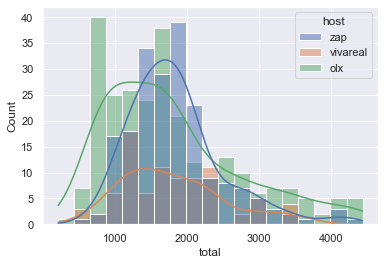

In [42]:
def find_duplicates(dataset):
    ret = np.zeros(len(dataset))
    for i in range(len(dataset)):
        anuncio_i = dataset.iloc[i]
        for j in range(i + 1, len(dataset)):
            anuncio_j = dataset.iloc[j]
            if anuncio_i.aluguel == anuncio_j.aluguel and anuncio_i.host != anuncio_j.host and anuncio_i.area == anuncio_j.area:
                ret[j] = 1
    return pd.Series(ret)


filtro = find_duplicates(df)

df_clean = df[filtro == 0]

df_clean= df_clean[df_clean.aluguel<10000]

sns.histplot(data=df_clean[df_clean.aluguel<4000],x='total', kde=True, hue='host')

Observando a diferença entre esse histograma e o anterior vemos que o VivaReal tem muitos dados duplicados das outras plataformas, e mesmo removendo os dados duplicados o Olx segue como um grande destaque em anuncios de apartamentos mais baratos.

### Modelo de aprendizado de maquina

Soltem as maquinas! Hora de aplicar os dados extraidos e agora limpos nos modelos de aprendizado de maquina. Para tal, vamos levar em conta a area, o numero de quartos, o numero de banheiros e o numero de garagens para tentar prever qual será o valor total para se viver naquele imovel.

In [43]:
from sklearn.model_selection import train_test_split

X=df_clean[['area', 'quartos', 'banheiros', 'garagens']]
y=df_clean['total']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


O modelo de regressão que ultilizaremos é a regreção por floresta aleatoria, vamos  fazer um teste simples com 12 estimadores apenas para ter uma noção da precisão que teremos com esse projeto.

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=12, random_state=42)

rf.fit(X_train, y_train)

preds = rf.predict(X_test)
errors = np.abs(preds - y_test)
std = np.sqrt(np.sum(errors**2) / len(errors))
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print(
    'a precisão que temos em um modelo simples é de %.1f%% e com desvio de +- R$ %.2f'
    % (accuracy, std))

a precisão que temos em um modelo simples é de 74.3% e com desvio de +- R$ 633.45


74% parece até ok para mo nosso modelo dado que não estamos usando a localização dos apartamentos e existem diversos fatores como armarios, portaria, mobilia e varanda que não estão presentes nos dados. Já o desvio está meio alto, mas também é esperado dado que estamos levando em conta dados com uma alta variancia de valor para o total do aluguel.

Hora de tentar melhorar esse modelo. Para isso vamos tentar melhorar os parametros por meio de uma procura de rede. Esse codigo pode demorar um pouco para rodar mas não é nada muito longo.

In [47]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [10, 15, 20, 30]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [70, 80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 15, 20, 30]},
             verbose=2)

In [49]:
best_model=grid_search.best_estimator_

preds= best_model.predict(X_test)
errors=np.abs(preds-y_test)
best_std=np.sqrt(np.sum(errors**2)/len(errors))
mape = 100 * np.mean(errors / y_test )
best_accuracy = 100 - mape
best_std


print(
    'a melhor precisão que conseguimos no modelo é de %.1f%% e com desvio de +- R$ %.2f'
    % (best_accuracy, best_std))

a melhor precisão que conseguimos no modelo é de 75.1% e com desvio de +- R$ 658.35


Melhoramos um pouco a precisão! Mas perdemos no desvio padrão. Uma pena, mas o que ja conseguimos está otimo.

### Previsão do meu aluguel

Voltando ao proposito original desse projeto, vamos agora aplicar os dados do meu apartamento nesse modelo. Em seguida vamos fazer uns gráficos para termos uma noção de como meu apartamento está em meio ao mercado

In [55]:
mean=best_model.predict(np.array([75,2,1,1]).reshape(1, -1))
print("um apartamento nos padrões do meu custa em média R$ %.2f"%(mean))

um apartamento nos padrões do meu custa em média R$ 1380.95


pagamos mais barato que 74.89% das pessosoas com apartamentos no mesmo padrão


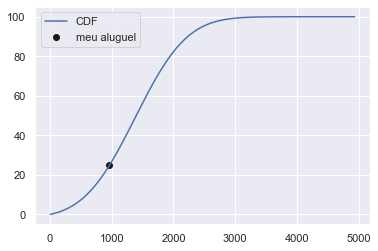

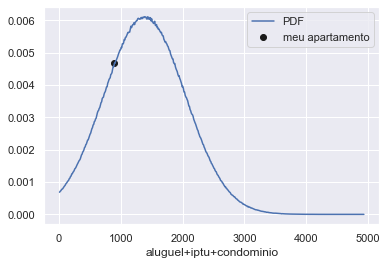

In [58]:
data=np.random.normal(mean, best_std, 10000000)
data=data[data>0]

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


count, bins_count = np.histogram(data, bins=1000)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

# plotting PDF and CDF
plt.plot(bins_count[1:], cdf*100, label="CDF")
plt.scatter(bins_count[find_nearest(bins_count, 960)], cdf[find_nearest(bins_count, 960)]*100, c='k', label='meu aluguel')
print('pagamos mais barato que %.2f%% das pessosoas com apartamentos no mesmo padrão'%(100.- cdf[find_nearest(bins_count, 960)]*100))
plt.legend()
plt.show()

count, bins_count = np.histogram(data, bins=500)

# finding the PDF of the histogram using count values
pdf = count / sum(count)
plt.plot(bins_count[1:], pdf, label='PDF')
plt.scatter(bins_count[find_nearest(bins_count, 900)], pdf[find_nearest(bins_count, 900)], c='k', label='meu apartamento')
plt.legend()
plt.xlabel("aluguel+iptu+condominio")
plt.show()

Vemos então que nosso apartamento está mais barato que a média, mas dentro do desvio padrão ele poderia estar até na média. O importante é que eu não estou sendo tapado rs.


### Considerações finais

Eu aprendi muita coisa com esse projeto e fiquei muito satisfeito com o resultado. Entretanto preciso reconhecer que existem varias melhorias que eu posso  executar para as próximas versões. A primeira (e talvez a mas importante) é levar em conta dos dados da loclização. O segredo é selecinar dentre a lsita de bairros abordados pelo dataset o que tem o nome mais proximo do dado da localização, o que me daria um trabalhinho mas que eu estou muito ansioso para tentar. Além disso, é interessante tentar melhorar o estimador (o modelo de aprendizado de máquina) por meio de outras procuras em grade ou mesmo um modelo de aprendizado profundo. Tentar interagir com a página do quinto andar também é uma boa, embora a maioria dos anuncios do quinto também está nas outras plataformas.

No geral o projeto é promissor e uma boa maneira de se ter mais segurança ao pedir um desconto no aluguel (se você é o locatário) ou dar uma engrossada no preço do aluguel (se você é  o locador).